In [1]:
import napari
from napari.utils import nbscreenshot

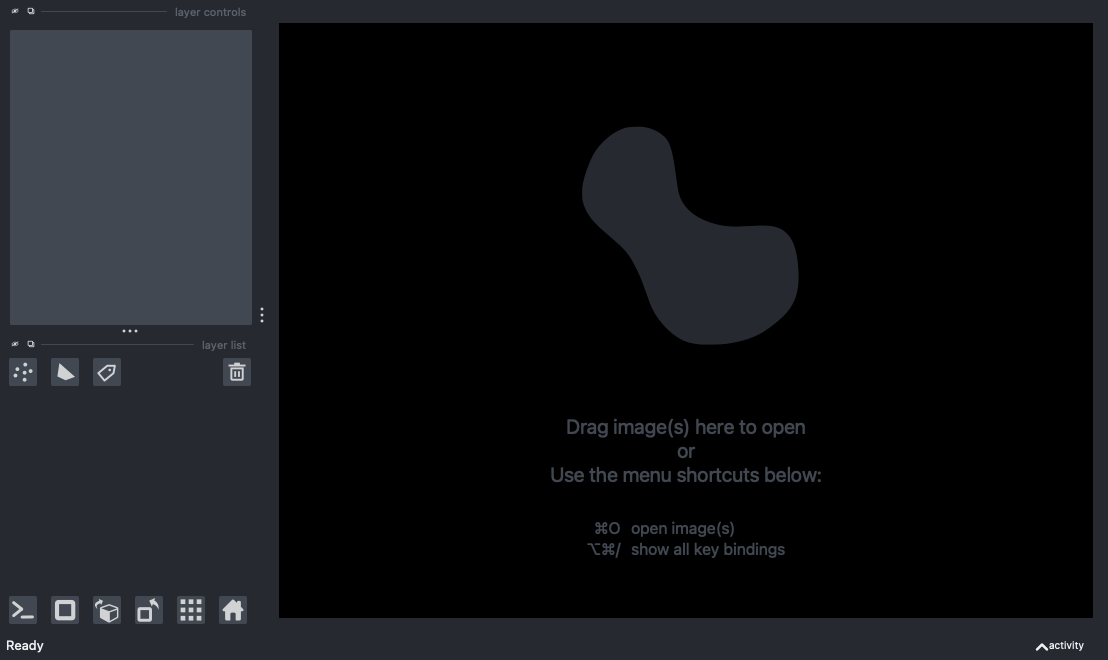

In [2]:
viewer = napari.Viewer()
nbscreenshot(viewer)

To make it easy let us just look at a small area of the image

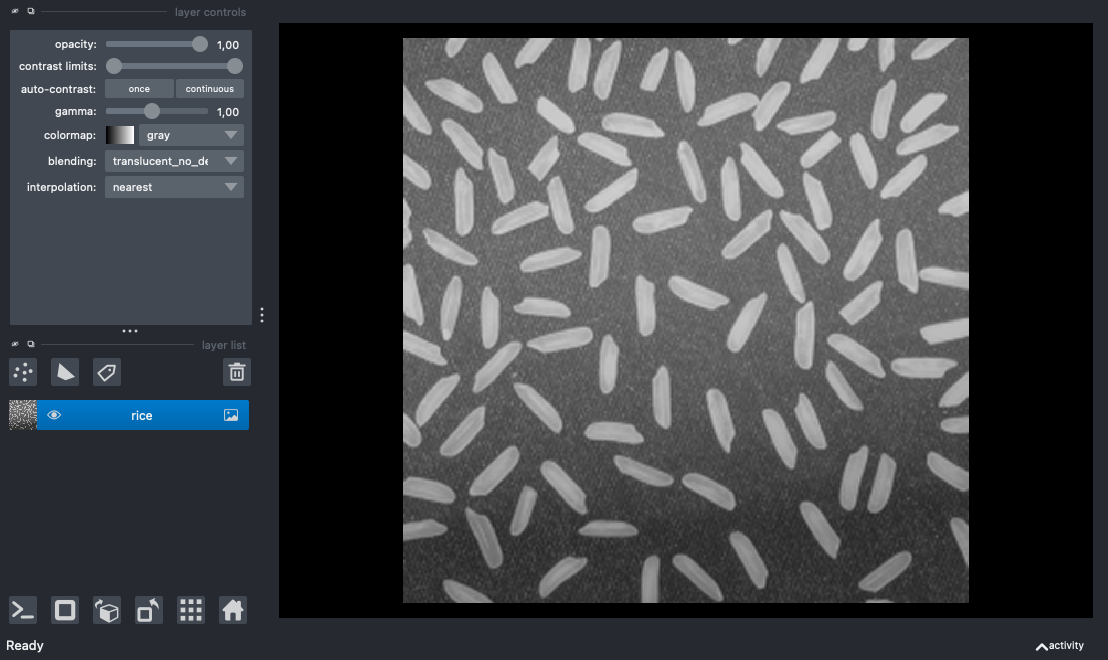

In [3]:
import skimage.io as skio

rice = skio.imread("data/rice.tif", plugin="tifffile")
viewer.add_image(rice, name = 'rice')
viewer.layers['rice'].colormap = 'gray'
nbscreenshot(viewer)

skimage has its own imshow which is convenient while hacking things

min pixel value:  33
max pixel value:  214


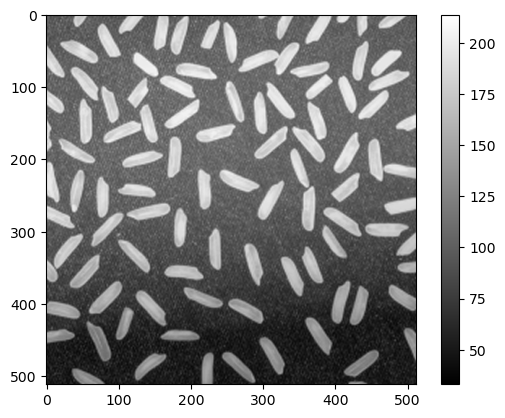

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import histogram

plt.imshow(rice, cmap='gray')
plt.colorbar()
print('min pixel value: ', rice.min())
print('max pixel value: ', rice.max())

Histograms are a common way of evaluating images and figuring out if the filtering/manipulations we are doing work

<BarContainer object of 182 artists>

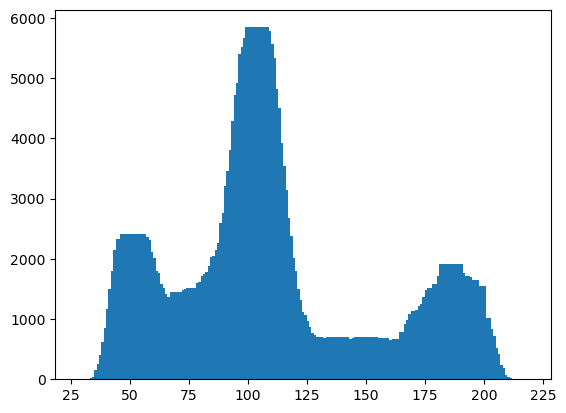

In [5]:
pix_counts, pix_vals = histogram(rice)
plt.bar(pix_vals, pix_counts, width = 10)

Segmentation is the process of changing from images (gray scales) to binary masks, so we decide what is background and what is foreground. In other methods we might also have more than one class of interest

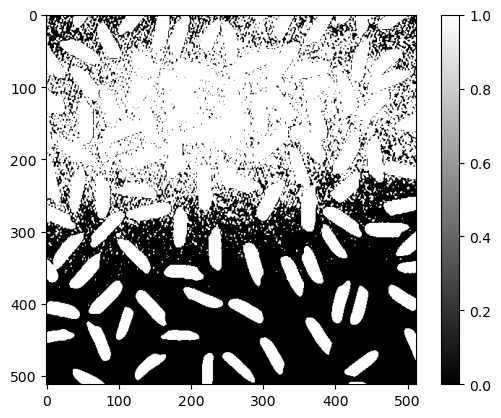

In [6]:
rice_mask = rice > 100
plt.imshow(rice_mask, cmap='gray')
plt.colorbar()

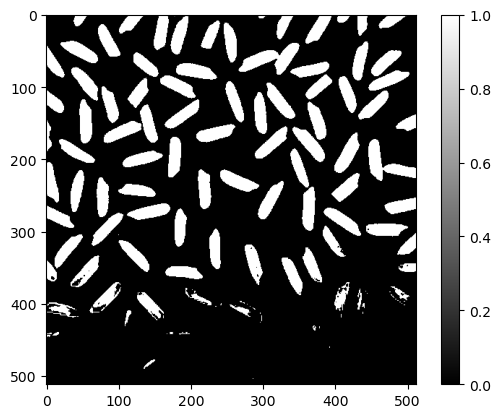

In [7]:
rice_mask = rice > 150
plt.imshow(rice_mask, cmap='gray')
plt.colorbar()

However we dont want to decide the th value by hand, there are many algorithms around, otsu is probably one of the most used one, together with triangle, and others

In [8]:
from skimage.filters import threshold_otsu

The value is:  131


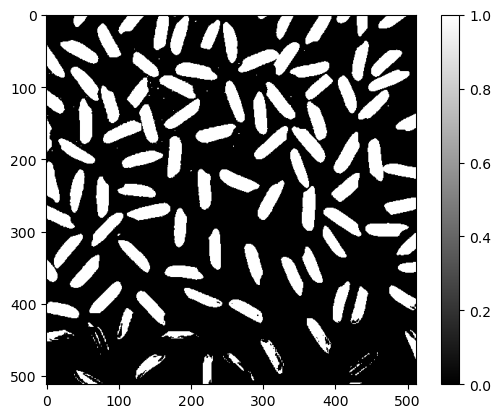

In [9]:
th_val = threshold_otsu(rice)
print('The value is: ', th_val)
bw_otsu = rice > th_val
plt.imshow(bw_otsu, cmap='gray')
plt.colorbar()